<a href="https://colab.research.google.com/github/rabiyulfahimhasim786/opencv-basics/blob/main/Table_to_text_or_csv_excel_using_opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.1 MB 31.5 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 42 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 0s (25.7 MB/s)
debconf: unable to initia

In [ ]:
!pip install -U pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Pillow-9.1.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


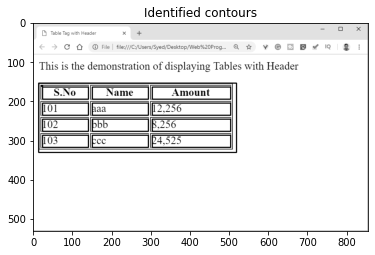

71.8
Rows
[[14, 153, 505, 177], [20, 159, 4, 2], [304, 163, 200, 31], [151, 163, 143, 31], [24, 163, 117, 31]]
[[304, 204, 200, 31], [151, 204, 143, 31], [24, 204, 117, 31]]
[[304, 245, 200, 31], [151, 245, 143, 31], [24, 245, 117, 31]]
[[304, 286, 200, 31], [151, 286, 143, 31], [24, 286, 117, 31]]
4
[404, 222, 82]
[ 82 222 404]
[[[14, 153, 505, 177], [20, 159, 4, 2], [24, 163, 117, 31]], [[151, 163, 143, 31]], [[304, 163, 200, 31]], []]
[[[24, 204, 117, 31]], [[151, 204, 143, 31]], [[304, 204, 200, 31]], []]
[[[24, 245, 117, 31]], [[151, 245, 143, 31]], [[304, 245, 200, 31]], []]
[[[24, 286, 117, 31]], [[151, 286, 143, 31]], [[304, 286, 200, 31]], []]
[' —\n=\n~\nSo\n5\na\n\n \n\x0c \x0c S.No\n\x0c', ' Name\n\x0c', ' Amount\n\x0c', ' ', ' 101\n\x0c', ' aaa\n\x0c', ' 12,256\n\x0c', ' ', ' 102\n\x0c', ' bbb\n\x0c', ' 8,256\n\x0c', ' ', ' 103\n\x0c', ' ccc\n\x0c', ' 24,525\n\x0c', ' ']
 —
=
~
So
5
a

 
  S.No
  101
  102
  103
 
 Name
  aaa
  bbb
  ccc
 
 Amount
  12,256
  8,

In [ ]:
import cv2
import matplotlib.pyplot as plt
file=r'img.png'
img = cv2.imread(file,0)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
img_bin2 = 255-img
thresh1,img_bin_otsu = cv2.threshold(img_bin2,128,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
import numpy as np
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, np.array(img).shape[1]//100))
eroded_image = cv2.erode(img_bin_otsu, vertical_kernel, iterations=3)
vertical_lines = cv2.dilate(eroded_image, vertical_kernel, iterations=3)
hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (np.array(img).shape[1]//100, 1))
horizontal_lines = cv2.erode(img_bin_otsu, hor_kernel, iterations=5)
horizontal_lines = cv2.dilate(horizontal_lines, hor_kernel, iterations=5)
vertical_horizontal_lines = cv2.addWeighted(vertical_lines, 0.5, horizontal_lines, 0.5, 0.0)
vertical_horizontal_lines = cv2.erode(~vertical_horizontal_lines, kernel, iterations=3)
thresh, vertical_horizontal_lines = cv2.threshold(vertical_horizontal_lines,128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
bitxor = cv2.bitwise_xor(img,vertical_horizontal_lines)
bitnot = cv2.bitwise_not(bitxor)
import pytesseract
contours, hierarchy = cv2.findContours(vertical_horizontal_lines, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
boundingBoxes = [cv2.boundingRect(contour) for contour in contours]
(contours, boundingBoxes) = zip(*sorted(zip(contours, boundingBoxes),key=lambda x:x[1][1]))
boxes = []
for contour in contours:
  x, y, w, h = cv2.boundingRect(contour)
  if (w<1000 and h<500):
    image = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    boxes.append([x,y,w,h])
plotting = plt.imshow(image,cmap='gray')
plt.title("Identified contours")
plt.show()
rows=[]
columns=[]
heights = [boundingBoxes[i][3] for i in range(len(boundingBoxes))]
mean = np.mean(heights)
print(mean)
columns.append(boxes[0])
previous=boxes[0]
for i in range(1,len(boxes)):
  if(boxes[i][1]<=previous[1]+mean/2):
    columns.append(boxes[i])
    previous=boxes[i]
    if(i==len(boxes)-1):
      rows.append(columns)
  else:
    rows.append(columns)
    columns=[]
    previous = boxes[i]
    columns.append(boxes[i])
print("Rows")
for row in rows:
  print(row)
total_cells=0
for i in range(len(row)):
  if len(row[i]) > total_cells:
    total_cells = len(row[i])
print(total_cells)
center = [int(rows[i][j][0]+rows[i][j][2]/2) for j in range(len(rows[i])) if rows[0]]
print(center)
center=np.array(center)
center.sort()
print(center)
boxes_list = []
for i in range(len(rows)):
    l=[]
    for k in range(total_cells):
        l.append([])
    for j in range(len(rows[i])):
        diff = abs(center-(rows[i][j][0]+rows[i][j][2]/4))
        minimum = min(diff)
        indexing = list(diff).index(minimum)
        l[indexing].append(rows[i][j])
    boxes_list.append(l)
for box in boxes_list:
  print(box)
dataframe_final=[]
for i in range(len(boxes_list)):
    for j in range(len(boxes_list[i])):
        s=''
        if(len(boxes_list[i][j])==0):
            dataframe_final.append(' ')
        else:
            for k in range(len(boxes_list[i][j])):
                y,x,w,h = boxes_list[i][j][k][0],boxes_list[i][j][k][1], boxes_list[i][j][k][2],boxes_list[i][j][k][3]
                roi = bitnot[x:x+h, y:y+w]
                kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 1))
                border = cv2.copyMakeBorder(roi,2,2,2,2, cv2.BORDER_CONSTANT,value=[255,255])
                resizing = cv2.resize(border, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
                dilation = cv2.dilate(resizing, kernel,iterations=1)
                erosion = cv2.erode(dilation, kernel,iterations=2)                
                out = pytesseract.image_to_string(erosion)
                if(len(out)==0):
                    out = pytesseract.image_to_string(erosion)
                s = s +" "+ out
            dataframe_final.append(s)
print(dataframe_final)
arr = np.array(dataframe_final)
import pandas as pd
dataframe = pd.DataFrame(arr.reshape(len(rows), total_cells))
data = dataframe.style.set_properties(align="left")
#print(data)
#print(dataframe)
d=[]
for i in range(0,len(rows)):
  for j in range(0,total_cells):
    print(dataframe[i][j],end=" ")
  print()
print(dataframe)
dataframe.to_csv("output1.csv",encoding="utf-8-sig")


In [ ]:
from PIL import Image
import pytesseract

image = 'img.png'
text = pytesseract.image_to_string(Image.open(image), lang="eng")
print(text)

 

 

[) Teble Tag with Header x +

CQ O File | file///C:/Users/Syed/Desktop/Web%20Prog.. Q %& VY @

This is the demonstration of displaying Tables with Header

 

 

 

 

 

 

 

 

S.No Name Amount
101 laaa 12,256
102 Ibbb 8,256
103 lece 24,525

 

 

 

 

 

 

 

 

 

 

Bev e

ao

x

a:

 

 



In [ ]:
with open('abc.txt',mode ='w') as file:
  file.write(text)
  #print(result)